### Dawid Weiss

### 406410

### Zadanie 4c

# Monte Carlo estimation

**Problem 4c (Monte Carlo counting).** Consider the following problem: Given a DNF formula $\phi$, compute the number of assignments satisfying $\phi$. Doing this is #P hard, so efficient exact solutions are unlikely. But we can try finding a good estimate. Your task in this problem is to use an approach similar to the one in **Problem 4a** to find such an estimate. 

A DNF formula looks like this:
$$ \phi = (x_1 \wedge \neg x_3 \wedge x_4) \vee (\neg x_1 \wedge x_2)$$
This particular formula can be encoded using Python lists as follows:
$$ phi = [ [1,-3,4],[-1,2]]$$
You are given a sample formula below. 
 * Write a Python function that estimates the number of satisfying assignments for this formula using Monte Carlo sampling.
 * Using a histogram (or other methods) decide whether this is an efficient method.

In [1]:
M = 64
phi = [[55, 3, -50, -57, 2, 51, -5, -56, -45, 1], [28, -1, -26, 35, 42, -43, 45, -56, -11, 6], [-18, 43, 1, 64, -34, 28, 48, -13, 29, 49], [-21, 12, 7, -49, -25, -45, 8, -51, 5, -26], [6, -26, 27, 51, 2, 9, 49, 29, -42, -35], [-12, 4, -32, -60, 2, 56, 31, 58, -19, -46], [-10, -52, 25, -8, -56, -24, -51, 20, 36, 22], [-64, -26, -36, -14, 3, 42, -20, -59, 25, 33], [-31, -33, 40, -29, -12, -49, 28, 11, 7, 22], [-25, 23, -17, -61, 34, 32, 24, -52, -21, -26], [-48, -42, -43, -24, 14, 50, -64, 60, 7, -53], [-1, 2, -61, -24, -53, 34, -13, 36, -46, 3], [3, -52, 60, 39, 9, 59, 57, 32, 6, -7], [-17, -28, -58, 33, 16, -22, -13, 26, 18, -11], [47, -39, 46, 40, -18, 24, 6, -23, -64, -22], [-6, 60, 35, 1, 52, 18, -33, 43, 45, -11], [57, -34, -32, 16, -41, -25, 37, 40, 43, -5], [58, -51, -40, 42, 5, 27, -41, 20, 32, 30], [-48, -11, -15, -14, -27, 17, -33, 55, -64, -51], [-11, -8, 48, 57, 42, 64, 40, -45, 13, -25], [-40, -39, 46, -36, -51, -58, 14, 7, -18, -6], [31, 38, -11, -45, -14, -9, -63, 27, -35, -46], [40, 11, 28, -26, -25, -20, -41, 16, 61, -32], [-35, 6, -58, 30, 62, -36, -7, -37, 38, 51], [-13, 58, 1, 14, 52, 8, 45, -49, -21, 51], [10, -62, -39, -57, 15, -40, 56, -31, -47, 23], [37, 22, -21, 52, -5, -19, -7, 50, 34, 9], [18, 14, -31, 27, -2, 5, 3, 48, 63, -34], [-43, 39, -29, 34, 60, -10, -61, -49, -42, 57], [-32, -29, -16, 53, -38, 52, -36, -62, -5, 45], [-28, 25, -31, -41, -44, -37, 20, 48, 59, 24], [49, -59, -13, -56, -29, -2, -45, -62, -38, -26], [-33, -31, 53, 64, 15, 17, 12, 50, 46, -54], [56, 57, 22, 4, 46, 21, 49, 14, 43, -41], [-8, 18, -21, -15, -42, -64, 45, 14, 13, -33], [-32, 62, 2, 10, -49, -64, 15, -35, -20, -17], [54, -64, -20, 37, -5, -26, -41, -35, 32, -25], [60, 58, -23, -43, -2, 15, 10, 9, 59, -45], [9, 29, -17, 45, -53, 18, 19, 50, 42, -61], [54, -51, 9, -52, -40, -37, -18, -59, 48, 3], [-32, -17, 38, 12, -27, 45, 57, -51, 56, 4], [-12, 62, -17, -50, -32, -45, -56, 46, 19, -61], [51, -27, 56, 45, 59, -25, 3, -18, 60, -44], [-50, 5, -10, 12, -23, -41, 31, -59, -35, 30], [-5, 18, -4, -63, 22, -40, 10, -62, 61, -35], [1, -10, 31, -41, 56, -17, -61, 22, 46, -14], [-45, 32, 54, -48, -25, 10, 31, -63, 38, -17], [50, -46, 44, -57, -45, -1, -63, 15, 4, 12], [-39, -28, 49, -9, 53, 25, 47, -6, 24, -36], [-41, 59, 13, 15, 21, -20, -19, 2, -22, 37], [-31, 23, -57, -38, 30, 59, 28, 6, 53, 26], [-38, -62, 14, 26, 12, 46, 10, 35, -18, -43], [20, -10, -48, -62, -17, -27, 49, -11, 59, 7], [-43, -46, -14, -31, -62, 52, -10, 40, -63, 32], [15, -12, 43, -19, -34, -25, -14, 62, 50, 61], [24, -52, 32, 61, 18, -44, 49, 29, 55, -57], [-27, 25, 55, -57, 12, 9, -43, 29, 36, 18], [13, -27, 21, -24, -8, 39, -60, 34, -11, 54], [-51, -3, 12, 26, -9, -23, -18, 28, 24, 11], [-1, -10, 9, 35, -55, -30, 48, 53, -32, -24], [-59, -58, -30, -46, 17, 11, 3, -18, -1, -50], [-61, -52, 17, -4, -44, -56, 64, 37, -47, 46], [28, 59, -23, 29, -5, -41, 39, 57, 2, 34], [-54, 56, 5, -20, -6, 13, 49, 28, -42, 25]]


In [2]:
import random
import numpy
import matplotlib.pyplot as plt

In [3]:
def est_sample():
    #losowanie X_1...X_M
    X = [0]*M
    
    for i in range(M):
        X[i] = random.randint(0,1)
    
    result = False
    for kon in phi:
        result = True
        for x in kon:
            if x >= 0:
                if X[x-1] == 0:
                    result = False
            elif X[-x -1] == 1:
                result = False
        if result:
            return True
    return False

In [4]:
def estimate(N):
    A = 0
    
    #N prob
    for i in range(N):
        A += est_sample()
    return (A/N*(2**M))

In [5]:
%%time
print("Estimated number of satisfying assignments for 'phi': ")
print(estimate(100000))

Estimated number of satisfying assignments for 'phi': 
1.108649318829944e+18
CPU times: user 10.2 s, sys: 0 ns, total: 10.2 s
Wall time: 10.2 s


In [6]:
%%time

n_to_measure = [500*i for i in range(1,100)]

est = [0]*len(n_to_measure)
calc = [len(phi)/(2**len(phi[0]))*(2**M)]*len(n_to_measure)

for i in range(len(n_to_measure)):
    est[i] = estimate(n_to_measure[i])

CPU times: user 4min 19s, sys: 5.12 ms, total: 4min 19s
Wall time: 4min 19s


(array([ 1.,  0.,  1.,  2.,  4.,  1.,  7.,  8., 15., 20., 11., 15.,  8.,
         2.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([9.59230692e+17, 9.75586805e+17, 9.91942918e+17, 1.00829903e+18,
        1.02465514e+18, 1.04101126e+18, 1.05736737e+18, 1.07372348e+18,
        1.09007960e+18, 1.10643571e+18, 1.12279182e+18, 1.13914794e+18,
        1.15550405e+18, 1.17186016e+18, 1.18821627e+18, 1.20457239e+18,
        1.22092850e+18, 1.23728461e+18, 1.25364073e+18, 1.26999684e+18,
        1.28635295e+18]),
 <a list of 20 Patch objects>)

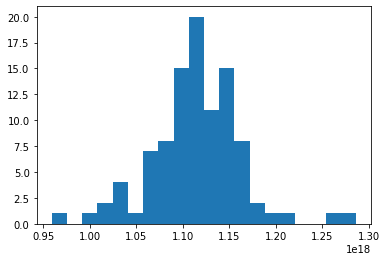

In [7]:
plt.hist(est,bins = 20)

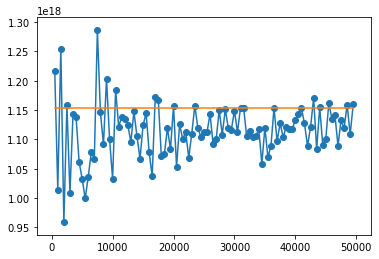

In [8]:
plt.plot(n_to_measure,est)
plt.scatter(n_to_measure,est)

prob = 1/2**4 * 2**64 #Wartosc gdyby wyrażenie było losowe (aby zobaczyc czy wykres nie oscyluje przypadkiem wokół tej wartosci)

plt.plot(n_to_measure,[prob]*len(n_to_measure))